# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [31]:
!pip install scikit-learn-extra

In [32]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Loading the data
data_CC_Customer = pd.read_excel('/content/drive/MyDrive/Applied Data Science/Project 2/Credit+Card+Customer+Data.xlsx')

data_CC_Customer .head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [35]:
data_CC_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- There are 660 total observations and 7 columns in this data.
- There are no null values.
- All variables are numerical.

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

In [36]:
data_CC_Customer[data_CC_Customer.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


- There are no duplicate values.

Customer Key
Skew : 0.05


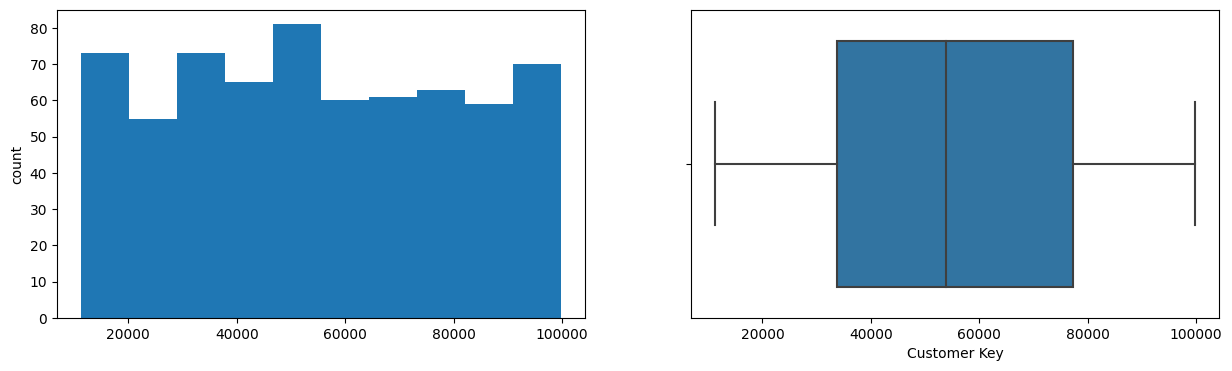

Avg_Credit_Limit
Skew : 2.2


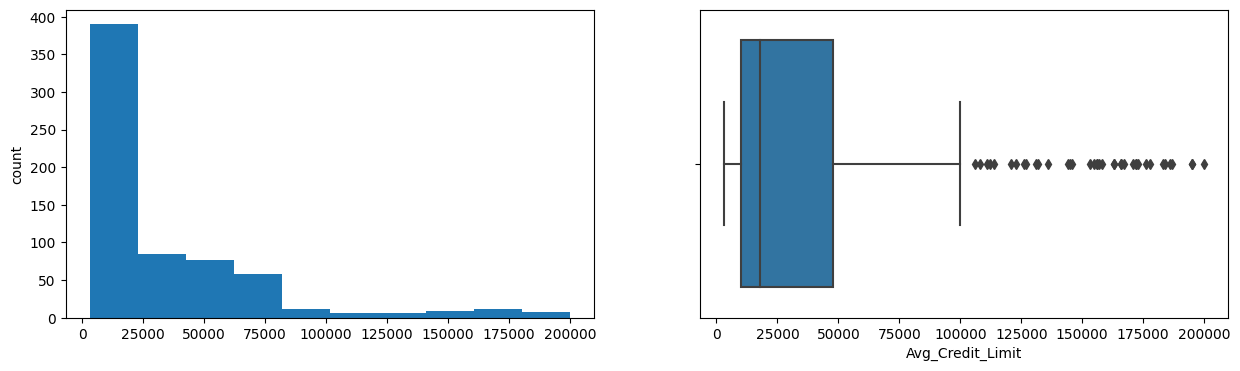

Total_Credit_Cards
Skew : 0.14


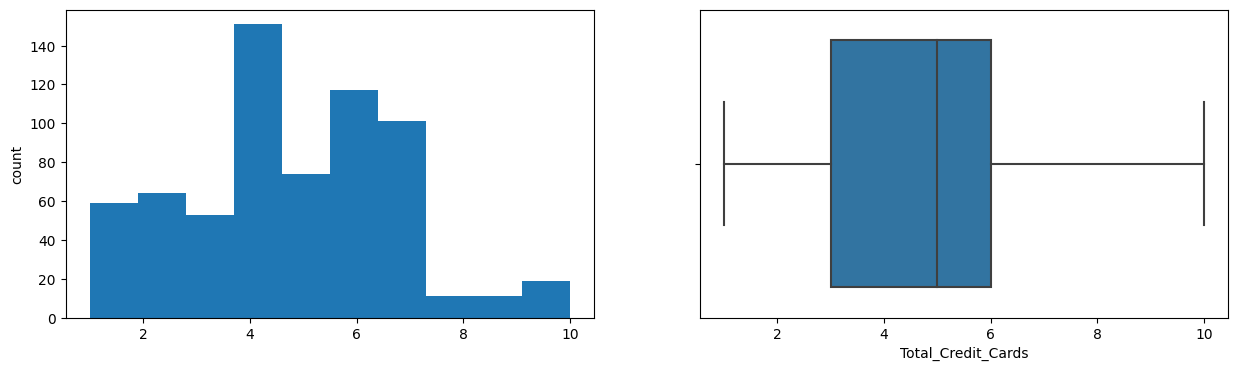

Total_visits_bank
Skew : 0.14


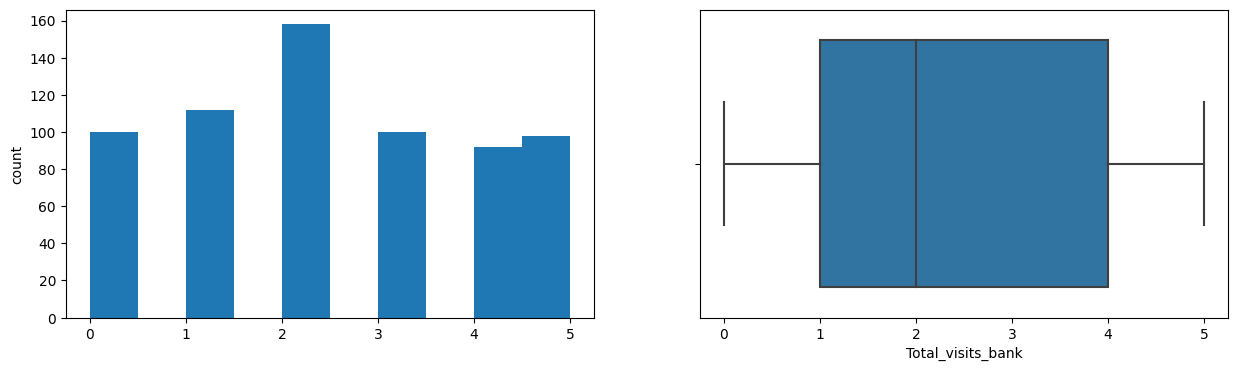

Total_visits_online
Skew : 2.23


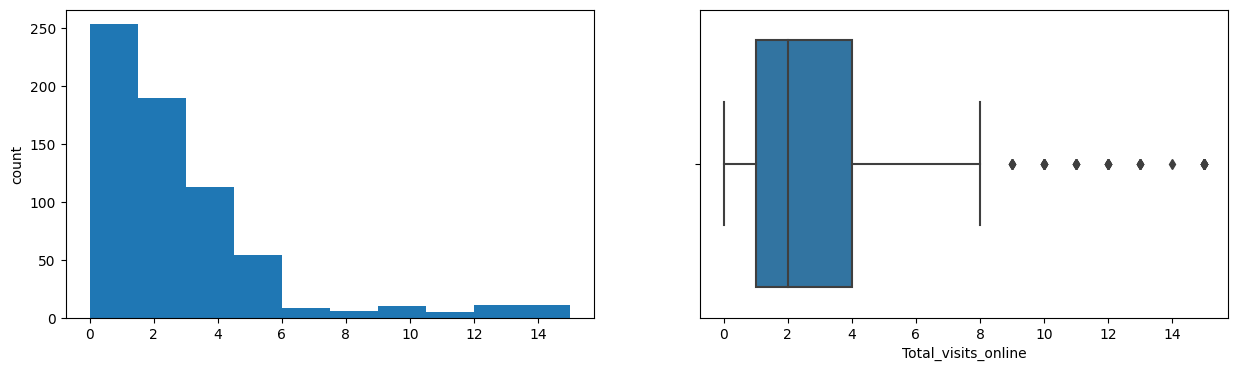

Total_calls_made
Skew : 0.66


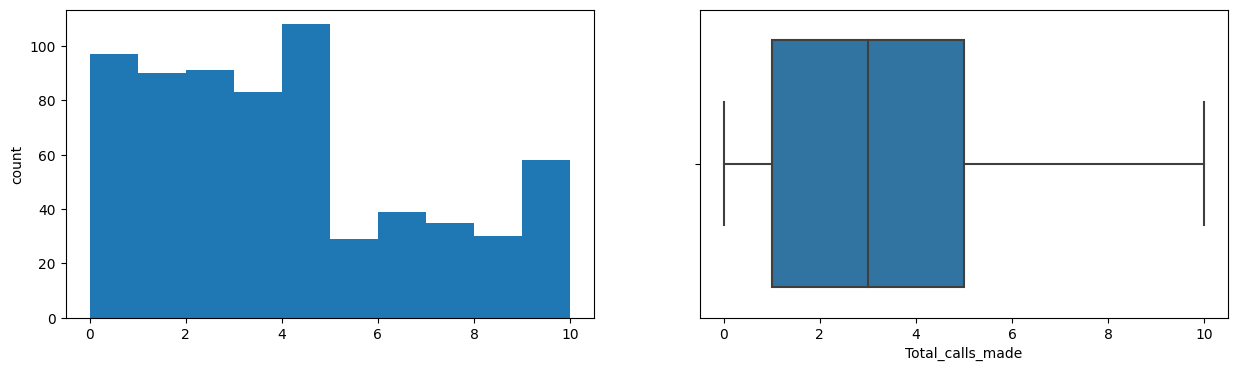

In [37]:
# Checking distribution and outliers for each variable in the data.
for col in data_CC_Customer.columns[1:]:
    print(col)

    print('Skew :', round(data_CC_Customer[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data_CC_Customer[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data_CC_Customer[col])

    plt.show()

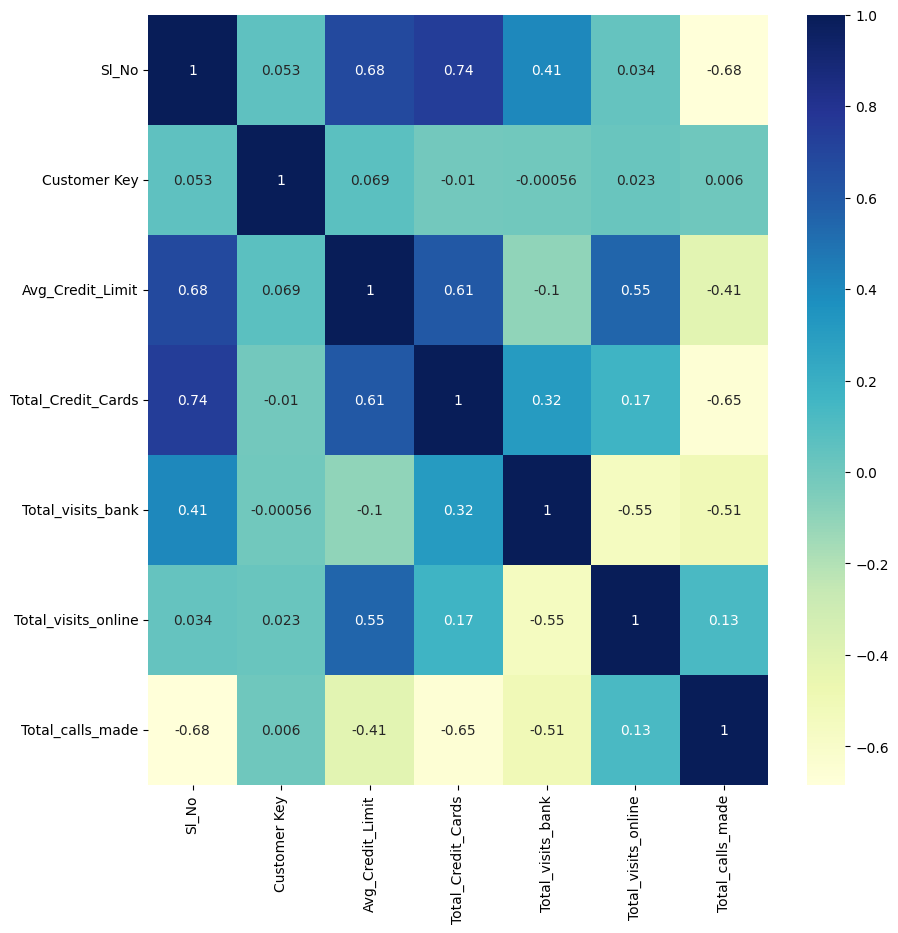

In [38]:
# checking the correlation among different variables
plt.figure(figsize  = (10, 10))

sns.heatmap(data_CC_Customer.corr(), annot = True, cmap = "YlGnBu")

plt.show()

#### **Check the summary Statistics**

In [39]:
data_CC_Customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations:___________**

#### **Scaling the data**

In [40]:
new_data_CC_Customer = data_CC_Customer.drop(columns = ["Sl_No", "Customer Key", "Avg_Credit_Limit"])

- Since 'Sl_No' and 'Customer Key' are unique for each customer and would not add value to clustering, I'll drop them.
- I will also drop the 'Avg_Credit_Limit' variable for now si I can analyse later if these clusters correspond to an average credit limit value for the customers in each cluster.

In [41]:
# Scaling the data and storing the output as a new DataFrame

scaler = StandardScaler()

data_CC_Customer_scaled = pd.DataFrame(scaler.fit_transform(new_data_CC_Customer ), columns = new_data_CC_Customer .columns)

data_CC_Customer_scaled.head()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.787585,-1.473731,2.520519,1.891859
2,1.058973,-0.860451,0.134290,0.145528
3,0.135694,-0.860451,-0.547490,0.145528
4,0.597334,-1.473731,3.202298,-0.203739


In [42]:
# Creating copy of the data to store labels from each algorithm
data_CC_Customer_scaled_copy = data_CC_Customer_scaled.copy(deep = True)

#### **Applying PCA on scaled data**

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

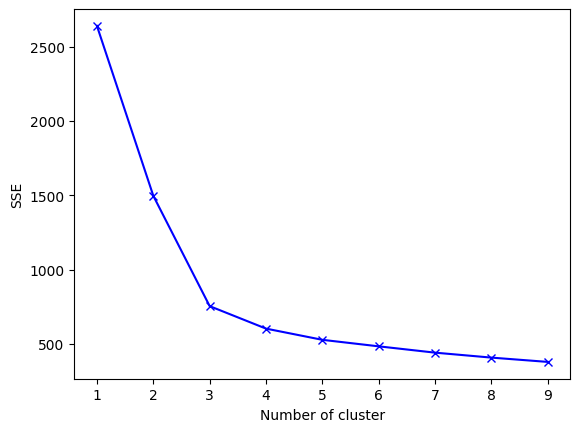

In [43]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_CC_Customer_scaled)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

- OBSERVATION: From the graph above, we can observe that the optimal value of K=3.

In [44]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data_CC_Customer_scaled)

# Adding predicted labels to the original data and the scaled data
data_CC_Customer_scaled_copy['KMeans_Labels'] = kmeans.predict(data_CC_Customer_scaled)

data_CC_Customer['KMeans_Labels'] = kmeans.predict(data_CC_Customer_scaled)

In [45]:
data_CC_Customer['KMeans_Labels'].value_counts()

1    387
0    223
2     50
Name: KMeans_Labels, dtype: int64

- OBSERVATION: This clustering is skewed having 50 observations in one cluser and 387 in another.

In [46]:
# Calculating the mean and the median of the original data for each label
mean = data_CC_Customer.groupby('KMeans_Labels').mean()

median = data_CC_Customer.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Sl_No,116.977578,417.260982,611.28,117.0,419.0,635.5
Customer Key,55163.973094,54925.966408,56708.76,55196.0,53002.0,53875.0
Avg_Credit_Limit,12197.309417,33713.178295,141040.00,12000.0,31000.0,145500.0
Total_Credit_Cards,2.403587,5.511628,8.74,2.0,6.0,9.0
Total_visits_bank,0.928251,3.485788,0.60,1.0,3.0,1.0
Total_visits_online,3.560538,0.984496,10.90,4.0,1.0,11.0
Total_calls_made,6.883408,2.005168,1.08,7.0,2.0,1.0


- OBSERVATION: When comparing the means of clusters across Average Credit limit, the table shows that Group 0 is clustered around customers who have a comparatevly low average credit limit at about 12K while Group 1 is clustered around customers with the highest average credit limit from among the clusters at about 34K.
- Given that Group 0 and 1 have high number of observations (223 and 387 respectively), it could be that most customers fall within these groups. italicized text

#### **Create the cluster profiles using the summary statistics and box plots for each label**

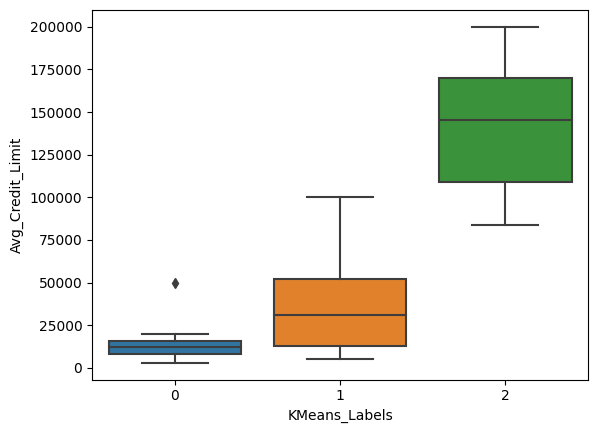

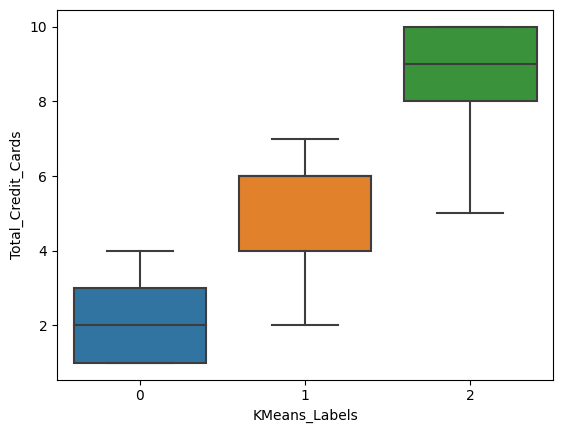

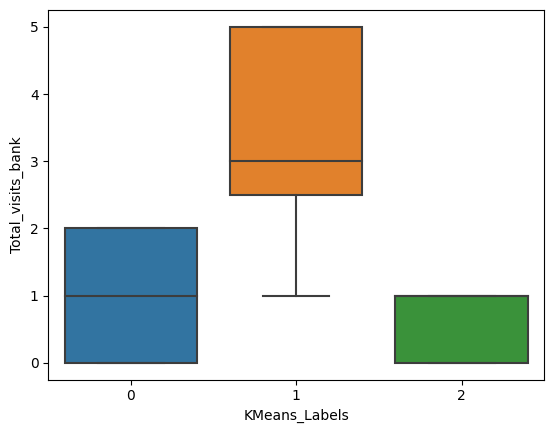

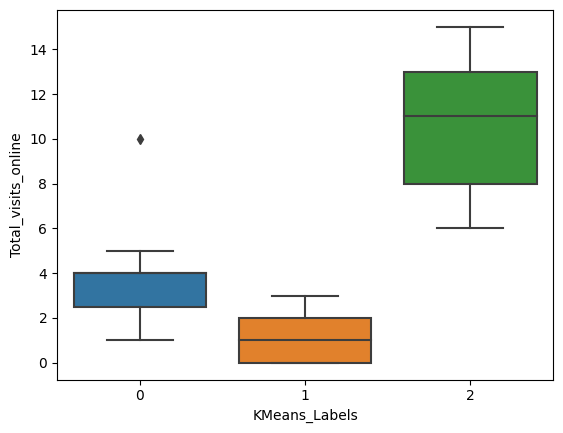

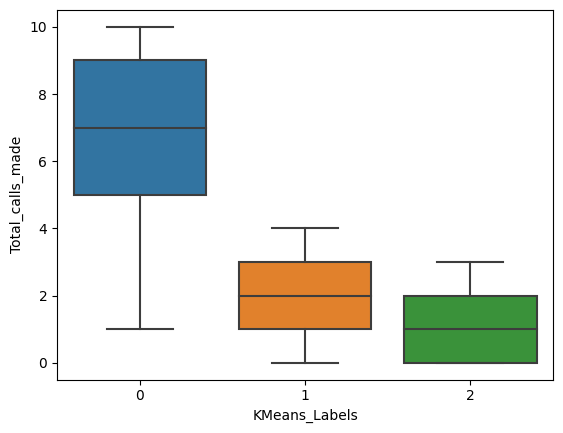

In [47]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data_CC_Customer)
    plt.show()

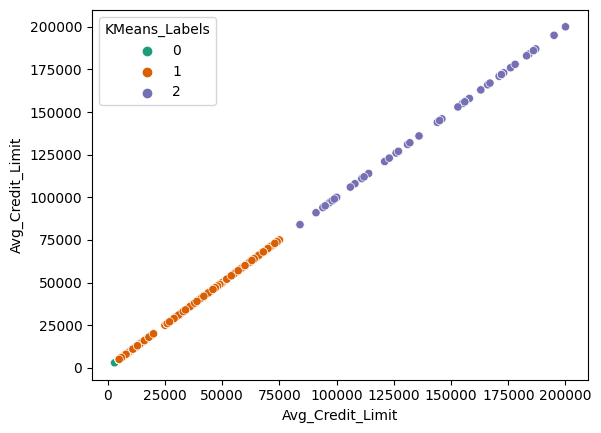

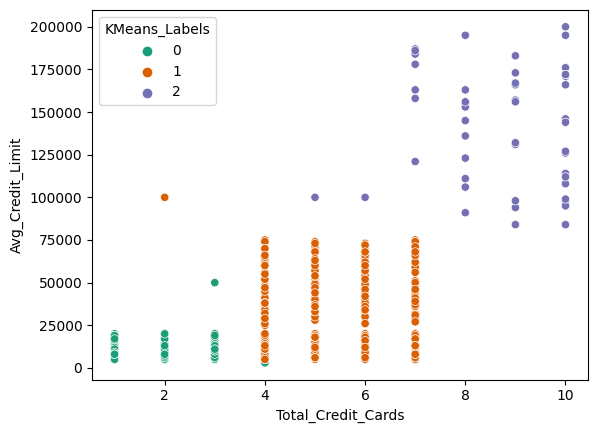

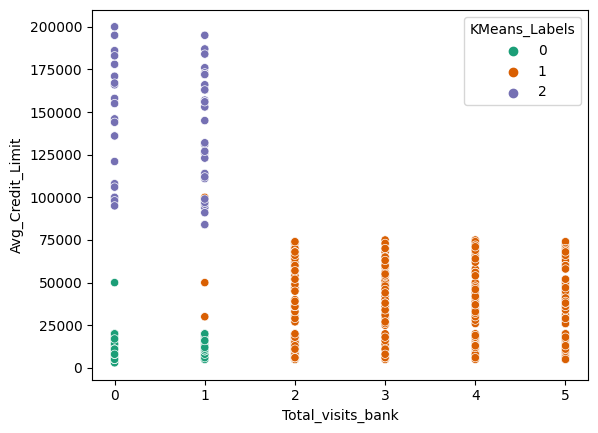

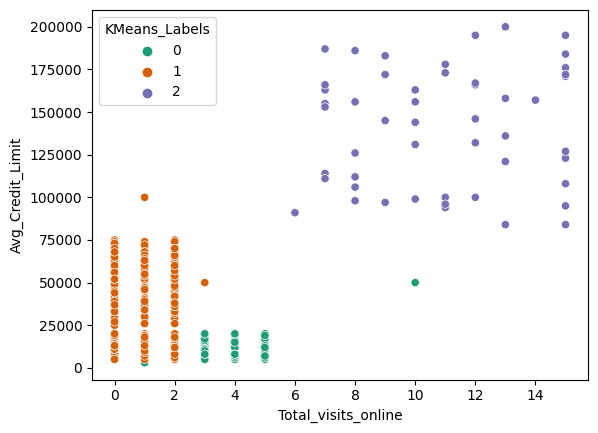

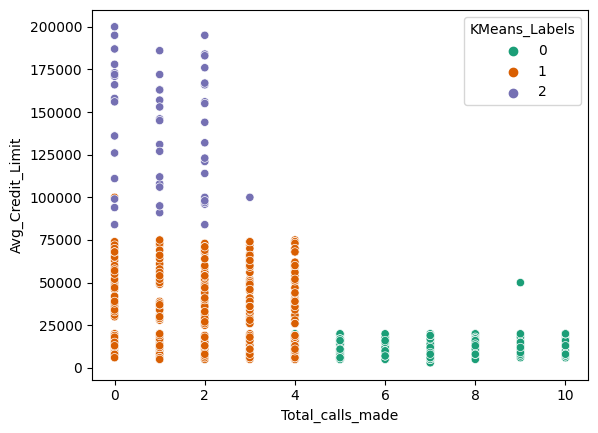

In [48]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'Avg_Credit_Limit', data = data_CC_Customer, hue = 'KMeans_Labels', palette = 'Dark2')

    plt.show()

**Cluster Profiles:_______________**

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [49]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_CC_Customer_scaled)

data_CC_Customer_scaled_copy['GmmLabels'] = gmm.predict(data_CC_Customer_scaled)

data_CC_Customer['GmmLabels'] = gmm.predict(data_CC_Customer_scaled)

In [50]:
data_CC_Customer.GmmLabels.value_counts()

1    388
0    222
2     50
Name: GmmLabels, dtype: int64

In [51]:
# Calculating the mean and the median of the original data for each label
original_features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data_CC_Customer.groupby('GmmLabels').mean()

median = data_CC_Customer.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12184.684685,33664.948454,141040.00,12000.0,31000.0,145500.0
Total_Credit_Cards,2.400901,5.505155,8.74,2.0,6.0,9.0
Total_visits_bank,0.932432,3.476804,0.60,1.0,3.0,1.0
Total_visits_online,3.572072,0.984536,10.90,4.0,1.0,11.0
Total_calls_made,6.909910,2.002577,1.08,7.0,2.0,1.0


- OBSERVATION: The results remain consistent in that group 0 and 1 belong to customers with low and high average credit limits respectively.
- The number of observations within each cluster is also consistently large in group 0 and 1 and very low in group 2.

#### **Create the cluster profiles using the summary statistics and box plots for each label**


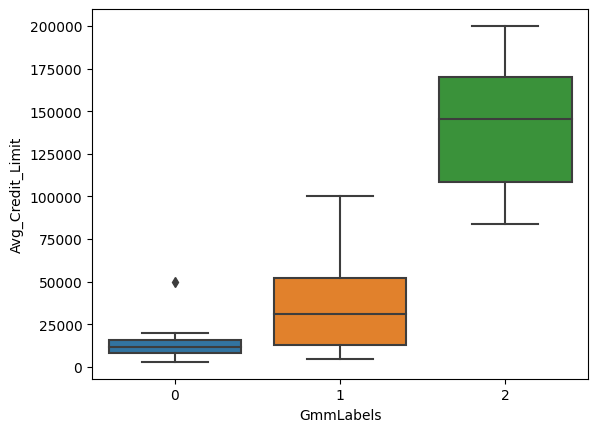

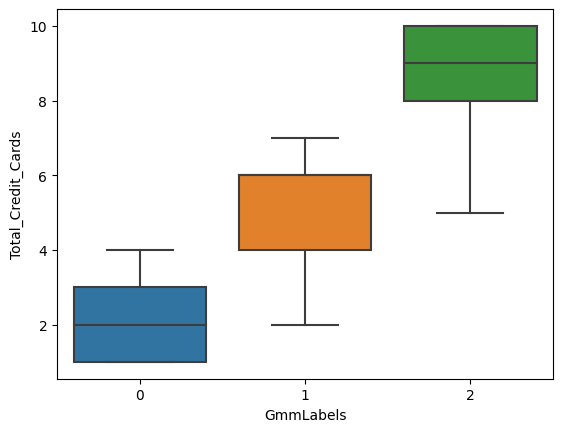

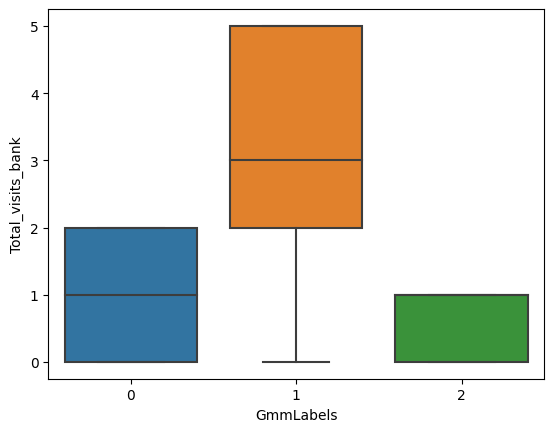

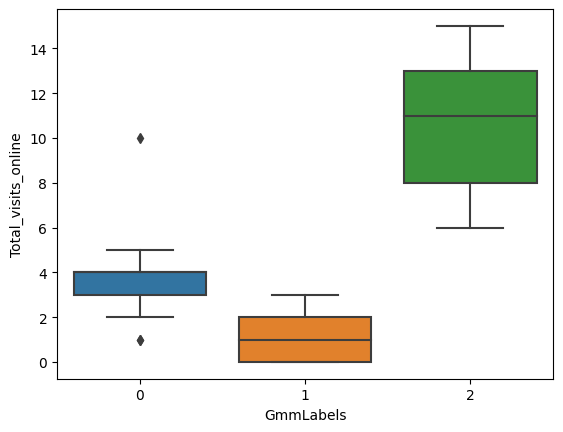

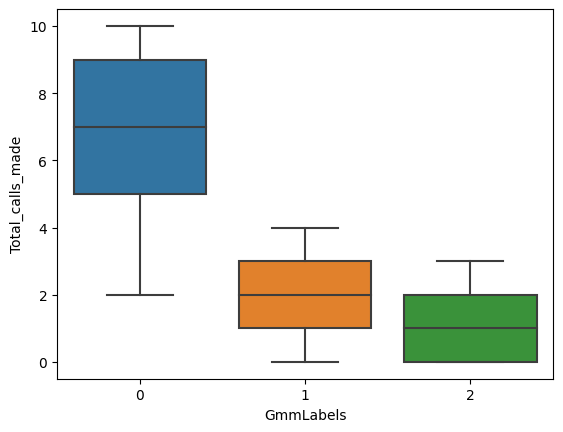

In [52]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data_CC_Customer)

    plt.show()

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

**Comparing Clusters:____________**

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [53]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_CC_Customer_scaled)

data_CC_Customer_scaled_copy['kmedoLabels'] = kmedo.predict(data_CC_Customer_scaled)

data_CC_Customer['kmedoLabels'] = kmedo.predict(data_CC_Customer_scaled)

In [54]:
data_CC_Customer.kmedoLabels.value_counts()

2    239
0    225
1    196
Name: kmedoLabels, dtype: int64

In [55]:
# Calculating the mean and the median of the original data for each label
original_features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data_CC_Customer.groupby('kmedoLabels').mean()

median = data_CC_Customer.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,14657.777778,54265.306122,37175.732218,12000.0,37500.0,35000.0
Total_Credit_Cards,2.480000,5.183673,6.410042,2.0,4.0,6.0
Total_visits_bank,0.911111,2.897959,3.401674,1.0,3.0,3.0
Total_visits_online,3.786667,3.096939,1.092050,4.0,2.0,1.0
Total_calls_made,6.831111,1.729592,2.046025,7.0,2.0,2.0


- OBSERVATION: The graph above confirms the observations from the K-means result where Group 0 and 1 consist customers with very low and very high average credit limits, respectively. The only difference is that the average credit limit within these clusters are higher.

#### **Create cluster profiles using the summary statistics and box plots for each label**

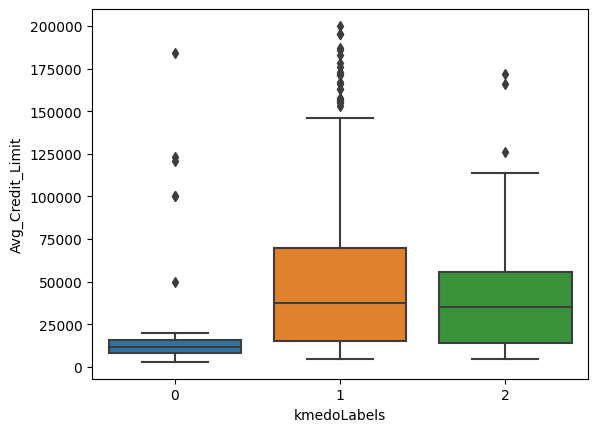

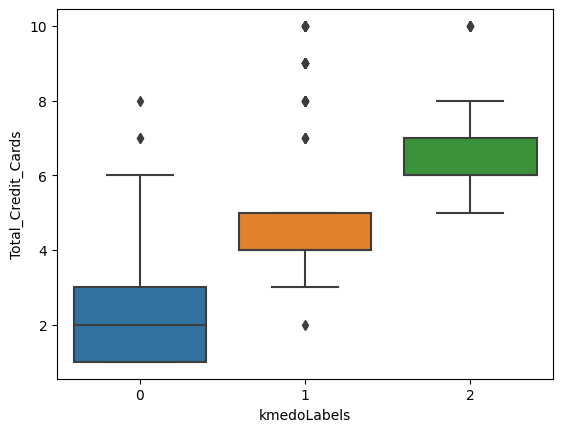

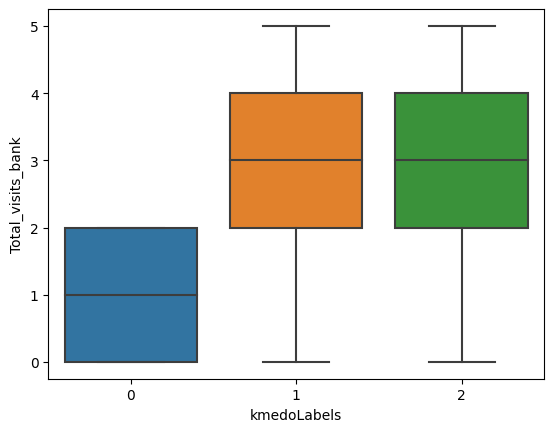

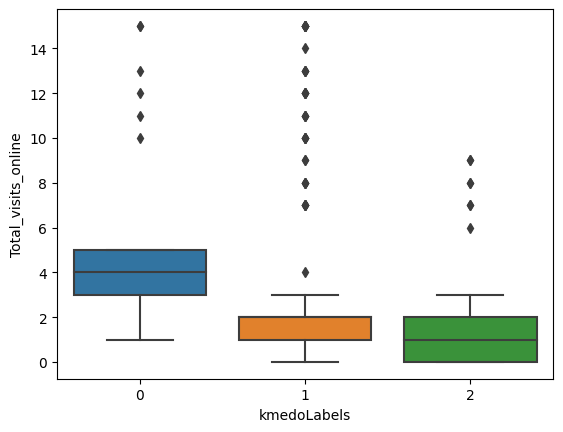

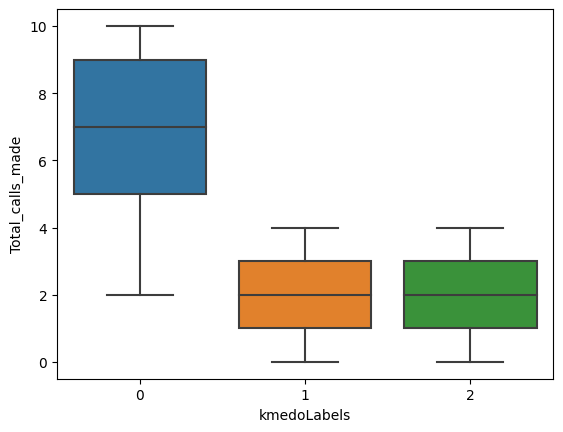

In [56]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data_CC_Customer)

    plt.show()

**Cluster Profiles:____________**

#### **Compare the clusters from K-Means and K-Medoids**

**Comparing Clusters**
- Both give the same results showing that when K=3 the two clusters with the largest observations Group 0 and 1 belong to customers with the lowest and higherst average credit limit customers, respectively.

## **Conclusions and Business Recommendations**

- Segmenting their customers based on their past spending behaviour- using the customer average credit limit- allows All Life Banks to segment their current customer base into three distinct groups. Developing marketing strategies catered to these distinct groups could incease customer satisfaction and help meet company goals.